In [2]:
import pandas as pd

files = [
    "/Users/toky/Downloads/examen_data/Ventes_2023_Part_1.xlsx",
    "/Users/toky/Downloads/examen_data/Ventes_2023_Part_2.xlsx",
    "/Users/toky/Downloads/examen_data/Ventes_2023_Part_3.xlsx",
    "/Users/toky/Downloads/examen_data/Ventes_2023_Part_4.xlsx",
    "/Users/toky/Downloads/examen_data/Ventes_2023_Part_5.xlsx",
    "/Users/toky/Downloads/examen_data/Ventes_2023_Part_6.xlsx",
    "/Users/toky/Downloads/examen_data/Ventes_2023_Part_7.xlsx",
    "/Users/toky/Downloads/examen_data/Ventes_2023_Part_8.xlsx",
    "/Users/toky/Downloads/examen_data/Ventes_2023_Part_9.xlsx",
    "/Users/toky/Downloads/examen_data/Ventes_2023_Part_10.xlsx"
]

data_frames = [pd.read_excel(file) for file in files]
data = pd.concat(data_frames, ignore_index=True)
print(data.head())


        Date    Produit Région  Quantité  Prix unitaire  Chiffre d'affaires
0 2023-04-13  Produit C  Ouest         9      56.916644          512.249799
1 2023-12-15  Produit C  Ouest        15      97.841244         1467.618661
2 2023-09-28  Produit A    Sud        18      21.299519          383.391348
3 2023-04-17  Produit B    Est        13      11.525290          149.828768
4 2023-03-13  Produit B    Sud         8      79.314239          634.513912


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.dtypes)

Date                  datetime64[ns]
Produit                       object
Région                        object
Quantité                       int64
Prix unitaire                float64
Chiffre d'affaires           float64
dtype: object


In [4]:
missing_data = data.isnull().sum()
print("Nombre de données manquantes par colonne :\n", missing_data)

data.fillna(method='ffill', inplace=True)
missing_data_after = data.isnull().sum()
print("Nombre de données manquantes après remplacement :\n", missing_data_after)

Nombre de données manquantes par colonne :
 Date                  0
Produit               0
Région                0
Quantité              0
Prix unitaire         0
Chiffre d'affaires    0
dtype: int64
Nombre de données manquantes après remplacement :
 Date                  0
Produit               0
Région                0
Quantité              0
Prix unitaire         0
Chiffre d'affaires    0
dtype: int64


/var/folders/4k/jl1bgbcs3j312mb10jd0g0lw0000gn/T/ipykernel_88550/2844565487.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [5]:
chiffre_daffaires_total = data['Chiffre d\'affaires'].sum()
chiffre_daffaires_par_produit = data.groupby('Produit')['Chiffre d\'affaires'].sum()
CA = pd.DataFrame({
    'Total': [chiffre_daffaires_total],
    'Par Produit': [chiffre_daffaires_par_produit]
})
print("Chiffre d'affaires total :")
print(CA['Total'])
print("\nChiffre d'affaires par produit :")
print(CA['Par Produit'].iloc[0])

Chiffre d'affaires total :
0    546231.955199
Name: Total, dtype: float64

Chiffre d'affaires par produit :
Produit
Produit A    187028.290157
Produit B    179920.204727
Produit C    179283.460316
Name: Chiffre d'affaires, dtype: float64


In [6]:
data['Mois'] = data['Date'].dt.month
pivot_table = pd.pivot_table(data, values='Chiffre d\'affaires', index='Mois', columns='Région', aggfunc='sum', fill_value=0)
print(pivot_table)

Région           Est          Nord         Ouest           Sud
Mois                                                          
1       10037.028399  13076.338478   7710.564014   8213.807744
2        9837.787233   9853.258419  19094.963887  10051.177005
3        3562.719474   8653.392696  10167.234999   8646.945490
4        9297.540059  14065.944384  10668.264692  14607.472470
5       10449.979162  16075.861928  13966.637315   8783.433772
6       12085.008995  12739.880874  12484.007879  12037.267731
7        9123.243007  10750.532192  10123.820477  10406.780030
8       16581.733330  18964.725727  14757.565811  11905.031135
9        5461.273695  10868.912146  17037.934449  14025.384478
10      13161.063580   8935.674540   9157.426860   9080.505937
11       5664.529823   7460.935302  12038.926403  10307.182117
12      12607.537699  16299.983513  16003.263805   9341.472040


In [7]:
referentiel_path = "/Users/toky/Downloads/examen_data/referentiel.xlsx"
referentiel = pd.read_excel(referentiel_path)
print("Aperçu du fichier référentiel:")
print(referentiel.head())

data_joined = pd.merge(data, referentiel, on='Produit', how='left')
print("Aperçu des données après jointure:")
print(data_joined.head())

Aperçu du fichier référentiel:
     Produit     Catégorie  Prix Standard
0  Produit A  Électronique             80
1  Produit B        Ménage             35
2  Produit C  Alimentation             15
Aperçu des données après jointure:
        Date    Produit Région  Quantité  Prix unitaire  Chiffre d'affaires  \
0 2023-04-13  Produit C  Ouest         9      56.916644          512.249799   
1 2023-12-15  Produit C  Ouest        15      97.841244         1467.618661   
2 2023-09-28  Produit A    Sud        18      21.299519          383.391348   
3 2023-04-17  Produit B    Est        13      11.525290          149.828768   
4 2023-03-13  Produit B    Sud         8      79.314239          634.513912   

   Mois     Catégorie  Prix Standard  
0     4  Alimentation             15  
1    12  Alimentation             15  
2     9  Électronique             80  
3     4        Ménage             35  
4     3        Ménage             35  


In [8]:
data_joined['mois'] = data_joined['Date'].dt.month
print(data_joined[['Date', 'mois']].head())

        Date  mois
0 2023-04-13     4
1 2023-12-15    12
2 2023-09-28     9
3 2023-04-17     4
4 2023-03-13     3


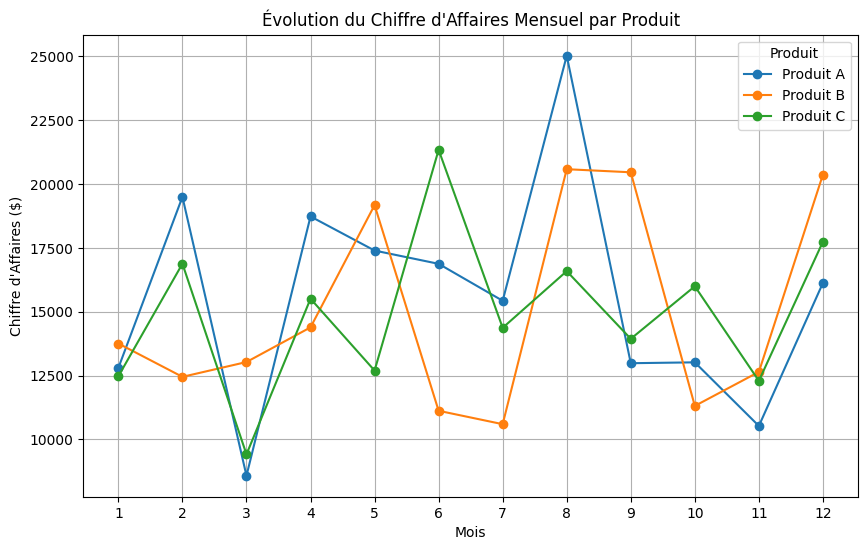

In [9]:
import matplotlib.pyplot as plt

data_joined['mois'] = data_joined['Date'].dt.month
pivot_table = pd.pivot_table(data_joined, values='Chiffre d\'affaires', index='mois', columns='Produit', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))
for product in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[product], marker='o', label=product)

plt.title('Évolution du Chiffre d\'Affaires Mensuel par Produit')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'Affaires ($)')
plt.grid(True)
plt.legend(title='Produit')
plt.xticks(range(1, 13))  
plt.show()

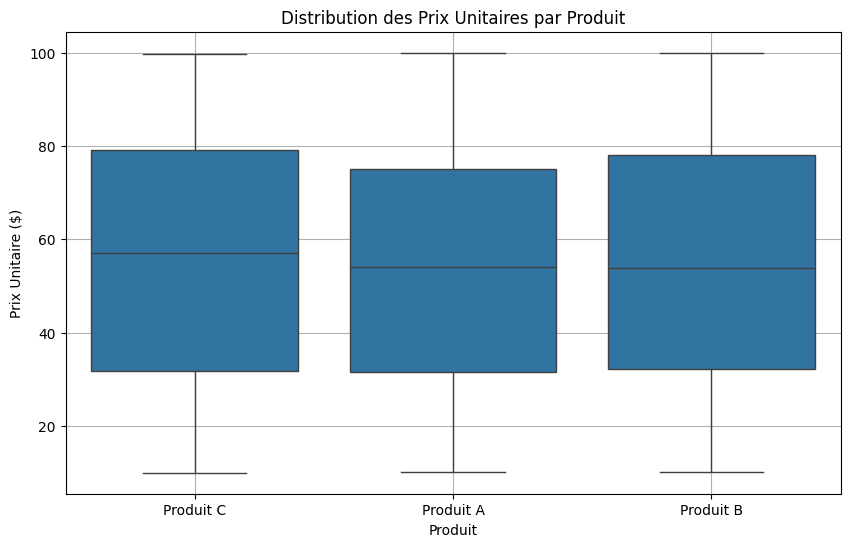

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Produit', y='Prix unitaire', data=data_joined)

plt.title('Distribution des Prix Unitaires par Produit')
plt.xlabel('Produit')
plt.ylabel('Prix Unitaire ($)')
plt.grid(True)
plt.show()

In [11]:
import xlwings as xw

wb = xw.Book()
wb.sheets.add('Data')
wb.sheets.add('Graphiques')
wb.sheets.add('Analyses')


sheet_data = wb.sheets['Data']
sheet_data.range('A1').options(index=False).value = data_joined


sheet_analyses = wb.sheets['Analyses']
sheet_analyses.range('A1').options(index=False).value = CA
sheet_analyses.range('A10').options(index=False).value = pivot_table

plt.figure(figsize=(10, 6))
sns.boxplot(x='Produit', y='Prix unitaire', data=data_joined)
plt.title('Distribution des Prix Unitaires par Produit')
plt.xlabel('Produit')
plt.ylabel('Prix Unitaire ($)')
plt.grid(True)
boxplot_path = 'boxplot.png'
plt.savefig(boxplot_path)
plt.close()


plt.figure(figsize=(10, 6))
for product in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[product], marker='o', label=product)
plt.title('Évolution du Chiffre d\'Affaires Mensuel par Produit')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'Affaires')
plt.legend(title='Produit')
plt.grid(True)
sales_plot_path = 'sales_plot.png'
plt.savefig(sales_plot_path)
plt.close()


sheet_graphs = wb.sheets['Graphiques']
sheet_graphs.pictures.add(boxplot_path, name='Boxplot', left=10, top=10)
sheet_graphs.pictures.add(sales_plot_path, name='Sales Chart', left=10, top=300)

# Sauvegarder et fermer le classeur
wb.save('Analyse_CA.xlsx')
wb.close()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [13]:
variances = pivot_table.var()

std_devs = pivot_table.std()
fluctuations = pd.DataFrame({
    'Variance': variances,
    'Écart Type': std_devs
})


fluctuations_sorted = fluctuations.sort_values(by='Écart Type', ascending=False)
print(fluctuations_sorted)

               Variance   Écart Type
Produit                             
Produit A  1.958623e+07  4425.633610
Produit B  1.574553e+07  3968.063552
Produit C  9.704862e+06  3115.262707


Si l'entreprise souhaite stabiliser ses ventes en éliminant les produits avec des ventes irrégulières, elle devrait commencer par réévaluer, et potentiellement éliminer, le Produit A en premier, suivi du Produit B. Le Produit C est celui qui présente la plus grande régularité en termes de chiffre d'affaires parmi les trois, bien qu'une analyse plus approfondie pourrait être nécessaire pour prendre une décision définitive, notamment en examinant d'autres facteurs tels que la saisonnalité, les tendances du marché et les préférences des consommateurs.

In [14]:
import statsmodels.api as sm

X = data_joined['Prix unitaire']  
y = data_joined['Quantité']       

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantité   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5952
Date:                Mon, 22 Apr 2024   Prob (F-statistic):              0.441
Time:                        11:45:37   Log-Likelihood:                -3126.5
No. Observations:                1000   AIC:                             6257.
Df Residuals:                     998   BIC:                             6267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.3290      0.406     25.428

In [12]:
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind

ventes_T1 = data_joined[data_joined['Date'].dt.month.isin([1, 2, 3])]['Chiffre d\'affaires']

ventes_T4 = data_joined[data_joined['Date'].dt.month.isin([10, 11, 12])]['Chiffre d\'affaires']

t_stat, p_value, df = ttest_ind(ventes_T1, ventes_T4, alternative='two-sided', usevar='pooled')

print(f"t-statistic: {t_stat}, p-value: {p_value}, degrees of freedom: {df}")

t-statistic: -0.5274137276706217, p-value: 0.5981573171394083, degrees of freedom: 466.0


D'après les résultats du test t de Student, la différence entre les ventes du premier trimestre (T1) et du dernier trimestre (T4) n'est pas statistiquement significative, avec une p-value de 0.598. Ce résultat nous indique qu'il n'y a pas de preuve suffisante pour affirmer que les variations de ventes entre ces deux périodes sont autre chose que le fruit du hasard.
L'entreprise devrait plutôt considérer que les ventes au cours de ces trimestres sont comparables et que toute variation observée ne justifie pas de changements stratégiques basés sur la saisonnalité.